In [27]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# !pip install imblearn
from imblearn.over_sampling import SMOTE



Extract depression labels

In [3]:
depression_data_train = pd.read_csv('train_split_Depression_AVEC2017.csv')
colnames=['Participant_ID', 'PHQ8_Binary', 'PHQ8_Score', 'Gender']
depression_data_test = pd.read_csv('full_test_split.csv', names = colnames)

depression_data_train = depression_data_train[['Participant_ID', 'PHQ8_Binary', 'PHQ8_Score', 'Gender']]
depression_data_dev = pd.read_csv('dev_split_Depression_AVEC2017.csv')
depression_data_dev = depression_data_dev[['Participant_ID', 'PHQ8_Binary', 'PHQ8_Score', 'Gender']]
depression_data = pd.concat([depression_data_train, depression_data_test, depression_data_dev], axis = 0)

depression_data['Participant_ID'] = pd.to_numeric(depression_data['Participant_ID'], errors ='coerce')
depression_data['PHQ8_Binary'] = pd.to_numeric(depression_data['PHQ8_Binary'], errors ='coerce')
depression_data['PHQ8_Score'] = pd.to_numeric(depression_data['PHQ8_Score'], errors ='coerce')
depression_data['Gender'] = pd.to_numeric(depression_data['Gender'], errors ='coerce')

In [4]:
depression_data.dropna(inplace=True, axis = 0)
depression_data = depression_data.sort_values('Participant_ID')
print(depression_data)

     Participant_ID  PHQ8_Binary  PHQ8_Score  Gender
1             300.0          0.0         2.0     1.0
2             301.0          0.0         3.0     1.0
0             302.0          0.0         4.0     1.0
0             303.0          0.0         0.0     0.0
1             304.0          0.0         6.0     0.0
..              ...          ...         ...     ...
105           488.0          0.0         0.0     0.0
32            489.0          0.0         3.0     1.0
33            490.0          0.0         2.0     1.0
106           491.0          0.0         8.0     0.0
34            492.0          0.0         0.0     0.0

[189 rows x 4 columns]


Read CSV file from OpenSMILE feature extraction of 189 participants

In [5]:
data = pd.read_csv('extracted_features/daicwoz_depression_study.csv')
data.drop('name', axis = 1, inplace = True)
data.drop('class', axis = 1, inplace = True)
data.dropna(inplace=True, axis = 1)
data.head(5)

,patientId,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,...,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope
0,300,2.679056,0.423084,0.794720,0.124331,0.190972,0.305545,0.066641,0.114573,0.181214,...,8.117617,0.516861,1.994565,1.994266,20.0,0.635602,87.70149,45.21441,87.39799,44.73018
1,301,1.053229,0.840398,0.320024,0.100621,0.190033,0.331551,0.089412,0.141518,0.230931,...,10.325200,0.631977,2.278584,2.278565,20.0,0.544154,97.64017,49.82011,95.10156,49.36152
2,302,0.597156,0.931581,0.148760,0.084234,0.120310,0.173754,0.036077,0.053443,0.089520,...,8.755386,0.541041,2.139736,2.138800,20.0,0.620535,92.78625,46.55551,93.42194,48.52549
3,303,1.435924,0.892916,0.910105,0.091640,0.171533,0.290585,0.079894,0.119052,0.198945,...,10.822950,0.538358,2.428957,2.428844,20.0,0.667465,99.70516,52.85253,98.50211,52.65401
4,304,1.079875,0.327209,0.058866,0.079375,0.135260,0.227631,0.055885,0.092371,0.148256,...,10.663530,0.581079,2.306990,2.307154,-20.0,0.536201,98.03202,50.34988,97.40340,52.59281


In [6]:
data['PHQ8_Binary'] = depression_data['PHQ8_Binary'].to_numpy().astype(int)
data['Gender'] = depression_data['Gender'].to_numpy().astype(int)
data.head(10)

,patientId,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,...,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope,PHQ8_Binary,Gender
0,300,2.679056,0.423084,0.794720,0.124331,0.190972,0.305545,0.066641,0.114573,0.181214,...,1.994565,1.994266,20.0,0.635602,87.70149,45.21441,87.39799,44.73018,0,1
1,301,1.053229,0.840398,0.320024,0.100621,0.190033,0.331551,0.089412,0.141518,0.230931,...,2.278584,2.278565,20.0,0.544154,97.64017,49.82011,95.10156,49.36152,0,1
2,302,0.597156,0.931581,0.148760,0.084234,0.120310,0.173754,0.036077,0.053443,0.089520,...,2.139736,2.138800,20.0,0.620535,92.78625,46.55551,93.42194,48.52549,0,1
3,303,1.435924,0.892916,0.910105,0.091640,0.171533,0.290585,0.079894,0.119052,0.198945,...,2.428957,2.428844,20.0,0.667465,99.70516,52.85253,98.50211,52.65401,0,0
4,304,1.079875,0.327209,0.058866,0.079375,0.135260,0.227631,0.055885,0.092371,0.148256,...,2.306990,2.307154,-20.0,0.536201,98.03202,50.34988,97.40340,52.59281,0,0
5,305,3.724201,0.817402,0.385395,0.270713,0.493085,0.785764,0.222372,0.292680,0.515052,...,2.043945,2.043940,20.0,0.644983,92.08940,46.22298,91.28673,45.43049,0,1
6,306,1.574296,0.000731,0.270634,0.248117,0.336399,0.454135,0.088282,0.117736,0.206018,...,2.238735,2.238594,20.0,0.546053,97.62820,48.71386,98.04881,50.16297,0,0
7,307,3.601312,0.663474,0.096325,0.400502,0.663665,1.062427,0.263162,0.398763,0.661925,...,2.626119,2.626136,-20.0,0.577628,109.57100,57.38061,108.40220,57.26747,0,0
8,308,1.310853,0.395340,0.858402,0.230021,0.281586,0.357188,0.051564,0.075603,0.127167,...,2.015718,2.016055,-20.0,0.573317,93.33223,46.69863,94.60362,46.87212,1,0
9,309,1.778718,0.323788,0.507145,0.137511,0.318449,0.537994,0.180938,0.219545,0.400483,...,2.930319,2.930833,-20.0,0.532951,117.22970,62.53411,110.24330,59.25640,1,1


In [7]:
data.drop('patientId',inplace=True, axis = 1)
data.head()

,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,...,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope,PHQ8_Binary,Gender
0,2.679056,0.423084,0.794720,0.124331,0.190972,0.305545,0.066641,0.114573,0.181214,0.066713,...,1.994565,1.994266,20.0,0.635602,87.70149,45.21441,87.39799,44.73018,0,1
1,1.053229,0.840398,0.320024,0.100621,0.190033,0.331551,0.089412,0.141518,0.230931,0.061118,...,2.278584,2.278565,20.0,0.544154,97.64017,49.82011,95.10156,49.36152,0,1
2,0.597156,0.931581,0.148760,0.084234,0.120310,0.173754,0.036077,0.053443,0.089520,0.058651,...,2.139736,2.138800,20.0,0.620535,92.78625,46.55551,93.42194,48.52549,0,1
3,1.435924,0.892916,0.910105,0.091640,0.171533,0.290585,0.079894,0.119052,0.198945,0.056184,...,2.428957,2.428844,20.0,0.667465,99.70516,52.85253,98.50211,52.65401,0,0
4,1.079875,0.327209,0.058866,0.079375,0.135260,0.227631,0.055885,0.092371,0.148256,0.053831,...,2.306990,2.307154,-20.0,0.536201,98.03202,50.34988,97.40340,52.59281,0,0


In [ ]:
# sns.set_style('white')
# data.hist(bins=50,figsize=(20,20),color='dodgerblue');

In [ ]:
 
# ca = round(data.corr()['PHQ8_Binary'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar' ,color='gold' , figsize = (10,8))
# plt.figure(figsize=(80,60))
# plt.show() 

In [ ]:
#another way of visualizing it is with the heatmap
# fig = plt.subplots(figsize=[50,20])
# sns.heatmap(data.corr(),  annot=True, linewidths=0.05, fmt= '.2f',cmap='cool')
# plt.tick_params(axis='both', which='major', labelsize=14)
# plt.show() 

In [8]:
cor = data.corr()['PHQ8_Binary']
# cor.dropna(inplace=True)
indexes = cor[(cor <= 0.2) & (cor >=-0.2)].index

cor.drop(indexes, inplace = True)

cor.info()



<class 'pandas.core.series.Series'>
Index: 52 entries, audSpec_Rfilt_sma[1]_percentile99.0 to PHQ8_Binary
Series name: PHQ8_Binary
Non-Null Count  Dtype  
--------------  -----  
51 non-null     float64
dtypes: float64(1)
memory usage: 832.0+ bytes


In [13]:
data_new = data[cor.index]
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 52 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   audSpec_Rfilt_sma[1]_percentile99.0                189 non-null    float64
 1   audSpec_Rfilt_sma[1]_pctlrange0-1                  189 non-null    float64
 2   audSpec_Rfilt_sma[2]_percentile99.0                189 non-null    float64
 3   audSpec_Rfilt_sma[2]_pctlrange0-1                  189 non-null    float64
 4   mfcc_sma[6]_skewness                               189 non-null    float64
 5   mfcc_sma[6]_upleveltime25                          189 non-null    float64
 6   mfcc_sma[6]_upleveltime50                          189 non-null    float64
 7   mfcc_sma[8]_lpgain                                 189 non-null    float64
 8   mfcc_sma[11]_percentile99.0                        189 non-null    float64
 9   mfcc_sma[1

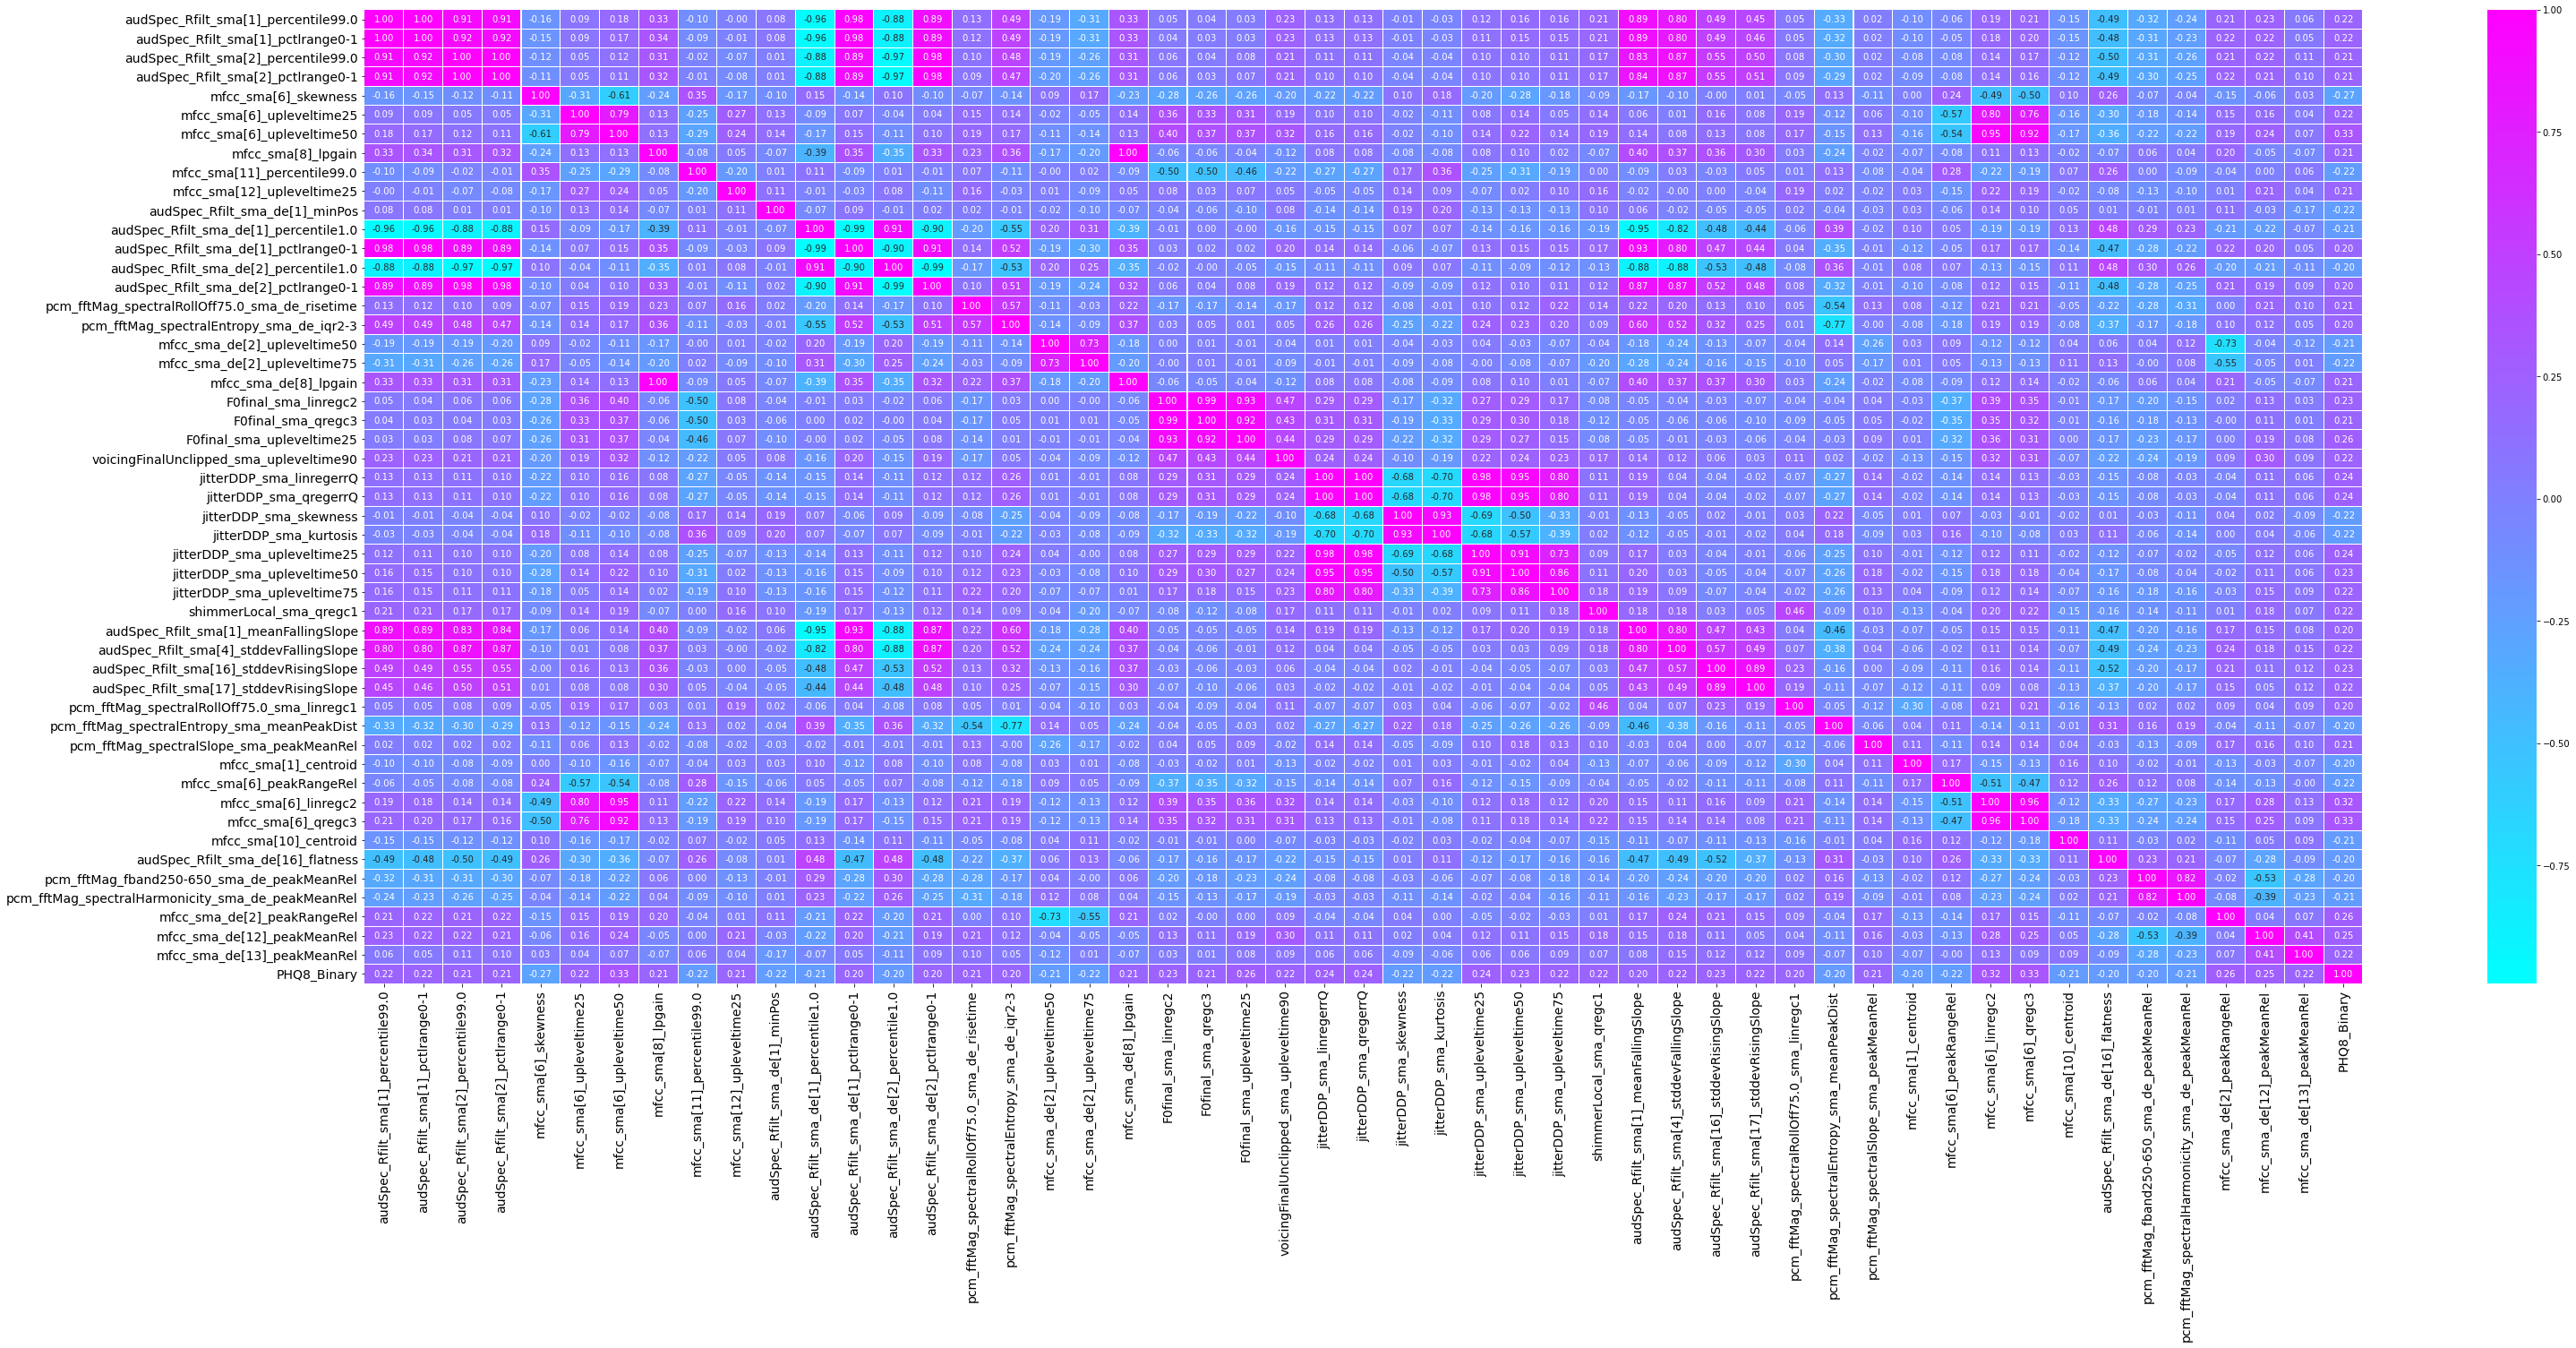

In [57]:
fig = plt.subplots(figsize=[50,20])
sns.heatmap(data_new.corr(),  annot=True, linewidths=0.05, fmt= '.2f',cmap='cool')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show() 

In [14]:
#Remove high correlated features

data_new.drop('audSpec_Rfilt_sma[1]_pctlrange0-1',axis = 1,inplace=True)
data_new.drop('audSpec_Rfilt_sma[2]_percentile99.0',axis = 1,inplace=True)
data_new.drop('audSpec_Rfilt_sma[2]_pctlrange0-1',axis = 1,inplace=True)
data_new.drop('audSpec_Rfilt_sma_de[1]_pctlrange0-1',axis = 1,inplace=True)
data_new.drop('audSpec_Rfilt_sma_de[1]_percentile1.0',axis = 1,inplace=True)
data_new.drop('audSpec_Rfilt_sma_de[2]_percentile1.0',axis = 1,inplace=True)
data_new.drop('audSpec_Rfilt_sma_de[2]_pctlrange0-1',axis = 1,inplace=True)
data_new.drop('audSpec_Rfilt_sma[1]_meanFallingSlope',axis = 1,inplace=True)
data_new.drop('audSpec_Rfilt_sma[4]_stddevFallingSlope',axis = 1,inplace=True)
data_new.drop('jitterDDP_sma_qregerrQ',axis = 1,inplace=True)
data_new.drop('jitterDDP_sma_skewness',axis = 1,inplace=True)
data_new.drop('jitterDDP_sma_kurtosis',axis = 1,inplace=True)
data_new.drop('jitterDDP_sma_upleveltime25',axis = 1,inplace=True)
data_new.drop('jitterDDP_sma_upleveltime50',axis = 1,inplace=True)
data_new.drop('jitterDDP_sma_upleveltime75',axis = 1,inplace=True)   
                        


/var/folders/91/v5qfgz393tvgy17j2jgngv_00000gn/T/ipykernel_2275/3888838918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.drop('audSpec_Rfilt_sma[1]_pctlrange0-1',axis = 1,inplace=True)
/var/folders/91/v5qfgz393tvgy17j2jgngv_00000gn/T/ipykernel_2275/3888838918.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.drop('audSpec_Rfilt_sma[2]_percentile99.0',axis = 1,inplace=True)
/var/folders/91/v5qfgz393tvgy17j2jgngv_00000gn/T/ipykernel_2275/3888838918.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

In [1]:


train, test = train_test_split(data_new, test_size = 0.30, train_size = 0.70, random_state=0)

train_labels = train['PHQ8_Binary']
# train_phq_score = train['PHQ8_Score']
test_labels = test['PHQ8_Binary']
# test_phq_score = test['PHQ8_Score']
train.drop('PHQ8_Binary', axis = 1, inplace = True)
# train.drop('PHQ8_Score', axis = 1, inplace = True)
test.drop('PHQ8_Binary', axis = 1, inplace = True)
# test.drop('PHQ8_Score', axis = 1, inplace = True)
balance = SMOTE(sampling_strategy='auto')
train, train_labels = balance.fit_resample(train, train_labels)

train_labels.value_counts()

# print(train.shape)
# print(test.shape)

NameError: name 'train_test_split' is not defined

In [16]:
pca = PCA(n_components=3)
pca.fit(train)
train_pca = pca.transform(train)

train_pca.shape

(212, 3)

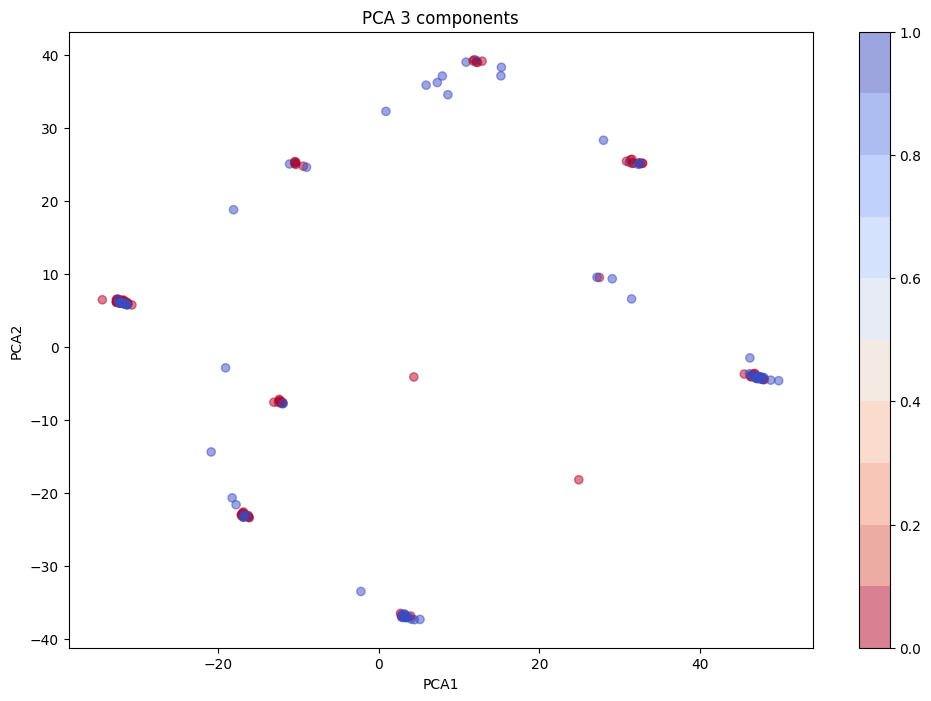

In [17]:
plt_pic = plt.figure(figsize=(12,8))
plt.scatter(train_pca[:,0],train_pca[:,1], c = train_labels, alpha =0.5 , cmap = plt.cm.get_cmap('coolwarm_r',10))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA 3 components')
plt.colorbar();

In [18]:
#PCA Logistic Regression
logReg = LogisticRegressionCV(penalty='l2', cv = 5)
logReg.fit(train_pca, train_labels)
test_pca = pca.transform(test)
predicted_pca = logReg.predict(test_pca)
test_labels = test_labels.to_numpy()

# print(predicted_pca)

print('acc',accuracy_score(test_labels, predicted_pca))
print('recall',recall_score(test_labels, predicted_pca))
print('prec',precision_score(test_labels, predicted_pca))
print('f1',f1_score(test_labels, predicted_pca))

acc 0.5789473684210527
recall 0.36363636363636365
prec 0.3076923076923077
f1 0.33333333333333337


In [25]:
logReg = LogisticRegressionCV(penalty='l2', cv = 5, max_iter=1000000)
logReg.fit(train, train_labels)
predicted = logReg.predict(test)

# print(predicted_pca)

print('acc',accuracy_score(test_labels, predicted))
print('recall',recall_score(test_labels, predicted))
print('prec',precision_score(test_labels, predicted))
print('f1',f1_score(test_labels, predicted))

acc 0.6842105263157895
recall 0.2727272727272727
prec 0.42857142857142855
f1 0.33333333333333326


In [30]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, n_estimators = 10000)

gbm.fit(train, train_labels)
predicted_gbm = gbm.predict(test)
# test_labels = test_labels.to_numpy()


print('acc',accuracy_score(test_labels, predicted_gbm))
print('recall',recall_score(test_labels, predicted_gbm))
print('prec',precision_score(test_labels, predicted_gbm))
print('f1',f1_score(test_labels, predicted_gbm))

acc 0.6842105263157895
recall 0.2727272727272727
prec 0.42857142857142855
f1 0.33333333333333326


In [35]:
print(test_labels)
print(predicted_gbm)

[0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0
 1]
[1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0
 0]
